This notebook contains two chapters, chapter one imports CSV's, merges the data, and ends in a display of bar plots. 
Chapter two, calls an API, cleans the data, concluding with a comparison.

In [1]:
#importing libraries
import pandas as pd

In [2]:
import matplotlib

In [3]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
#importing csv
df1 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/sugar%20in%20soda.csv")

In [7]:
df2 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/calories%20in%20soda%20-%20Sheet1.csv")

In [8]:
df3 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/sugar%20in%20energy%20drinks.csv")

In [9]:
df4 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/calories%20in%20energy%20drinks.csv")

In [10]:
#replace to run locally
#"C:\Users\sando\Documents\sugarproject\sugar in soda.csv
#"C:\Users\sando\Documents\sugarproject\calories in soda - Sheet1.csv
#"C:\Users\sando\Documents\sugarproject\sugar in energy drinks.csv
#"C:\Users\sando\Documents\sugarproject\calories in energy drinks.csv")

## Sodas

In [11]:
df1

,drink 20oz,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,65,57,75
1,dr pepper,64,68,100
2,pepsi,69,63,55
3,sprite,64,0,110
4,mtn dew,77,91,105
5,fanta,73,0,90
6,a&w root beer,72,0,135
7,canada dry,59,0,80
8,orange crush,71,0,120


In [12]:
df2

,drink 20oz,calories
0,coca-cola,240
1,dr pepper,250
2,pepsi,250
3,sprite,230
4,mtn dew,290
5,fanta,270
6,a&w root beer,270
7,canada dry,230
8,orange crush,270


In [13]:
#merges the calories columns with df1 table
soda_nf = pd.merge(df2, df1)

In [14]:
#displays my new table called -->
soda_nf

,drink 20oz,calories,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,240,65,57,75
1,dr pepper,250,64,68,100
2,pepsi,250,69,63,55
3,sprite,230,64,0,110
4,mtn dew,290,77,91,105
5,fanta,270,73,0,90
6,a&w root beer,270,72,0,135
7,canada dry,230,59,0,80
8,orange crush,270,71,0,120


(0.0, 80.0)

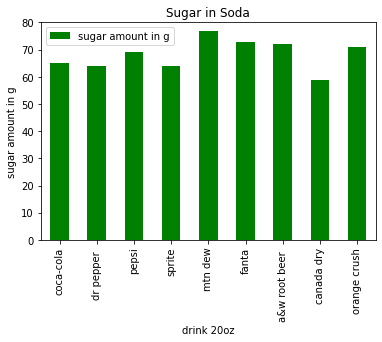

In [15]:
#Now, lets compare the sugar content
soda_nf.plot.bar(x='drink 20oz', y='sugar amount in g', color="#008000")
#Y label
plt.ylabel("sugar amount in g")
#title label
plt.title("Sugar in Soda")

#gca = Get Current Axis
ax = matplotlib.pyplot.gca()

#limits the y axis to 80
ax.set_ylim([0,80])

(0.0, 310.0)

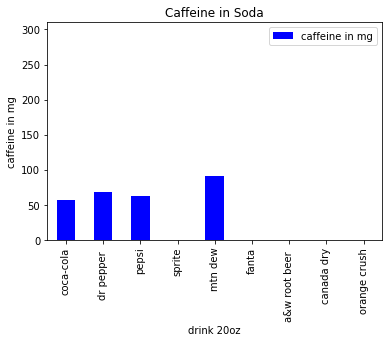

In [16]:
#What about the caffeine?
soda_nf.plot.bar(x='drink 20oz', y='caffeine in mg', color="#0000FF")
plt.ylabel("caffeine in mg")
plt.title("Caffeine in Soda")

ax = matplotlib.pyplot.gca()

#setting the caffeine axis to the same limit will make it easier to compare 
ax.set_ylim([0,310])

## Energy Drinks

In [17]:
#merging the energy drinks
energy_nf = pd.merge(df3, df4)

In [18]:
energy_nf

,drink 16oz,sugar amount in g,caffeine in mg,sodium in mg,calories
0,monster energy,54,160,370,230
1,red bull,51,151,190,210
2,mtn dew kickstart grape,20,90,170,80
3,rockstar original,63,160,70,250
4,bang blue razz,0,300,40,0
5,full throttle,58,160,160,220
6,vuka renew mango peach,44,160,0,180


(0.0, 80.0)

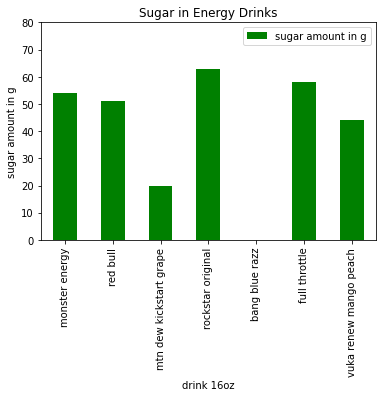

In [19]:
energy_nf.plot.bar(x='drink 16oz', y='sugar amount in g', color="#008000")
plt.ylabel("sugar amount in g")
plt.title("Sugar in Energy Drinks")
ax = matplotlib.pyplot.gca()
ax.set_ylim([0,80])

(0.0, 310.0)

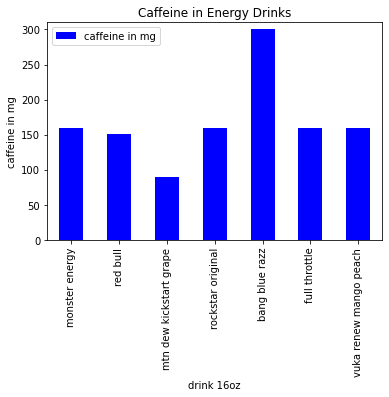

In [20]:
energy_nf.plot.bar(x='drink 16oz', y='caffeine in mg', color="#0000FF")
plt.ylabel("caffeine in mg")
plt.title("Caffeine in Energy Drinks")
ax = matplotlib.pyplot.gca()

#caffeine axis limit
ax.set_ylim([0,310])

# Chapter 2 

In [21]:
#calling an API
import requests

In [22]:
#verification
payload = {"x-app-id": "59722977", "x-app-key": "f5c1b03c53d7554ce01b0c3ee3c3955c"}

In [23]:
r = requests.get("https://trackapi.nutritionix.com/v2/search/instant?query=body armor", headers=payload)

In [24]:
r

<Response [200]>

In [25]:
json=r.json()

In [26]:
#all data
json

{'common': [{'food_name': 'french vanilla meal replacement body key',
   'serving_unit': 'scoop',
   'tag_name': 'body key French vanilla meal replacement shake mix',
   'serving_qty': 1,
   'common_type': 2,
   'tag_id': '15233',
   'photo': {'thumb': 'https://d2eawub7utcl6.cloudfront.net/images/nix-apple-grey.png',
    'highres': None,
    'is_user_uploaded': False},
   'locale': 'en_US'},
  {'food_name': 'body fortress super advanced whey protein vanilla',
   'serving_unit': 'scoop',
   'tag_name': 'body fortress super advanced whey protein vanilla',
   'serving_qty': 1,
   'common_type': 2,
   'tag_id': '12293',
   'photo': {'thumb': 'https://d2eawub7utcl6.cloudfront.net/images/nix-apple-grey.png',
    'highres': None,
    'is_user_uploaded': False},
   'locale': 'en_US'},
  {'food_name': 'amway bodykey chocolate meal replacement shake mix',
   'serving_unit': 'scoop',
   'tag_name': 'Amway BodyKey chocolate meal replacement shake mix',
   'serving_qty': 1,
   'common_type': 2,
   

In [27]:
#A list of every key in a dictionary
json.keys()

dict_keys(['common', 'branded'])

In [28]:
#I'm intrested in branded
json['branded']

[{'food_name': 'Berry Punch',
  'serving_unit': 'bottle',
  'nix_brand_id': '5412fbd892adfdc17bf3a367',
  'brand_name_item_name': 'Body Armor Berry Punch',
  'serving_qty': 1,
  'nf_calories': 20,
  'photo': {'thumb': 'https://nutritionix-api.s3.amazonaws.com/5c5a8819c6ce43a145c71257.jpeg'},
  'brand_name': 'Body Armor',
  'region': 1,
  'brand_type': 2,
  'nix_item_id': '5c5a8816c6ce43a145c71256',
  'locale': 'en_US'},
 {'food_name': 'SuperDrink, Peach Mango',
  'serving_unit': 'fl oz',
  'nix_brand_id': '5412fbd892adfdc17bf3a367',
  'brand_name_item_name': 'Body Armor SuperDrink, Peach Mango',
  'serving_qty': 12,
  'nf_calories': 15,
  'photo': {'thumb': 'https://nutritionix-api.s3.amazonaws.com/5c6e504ce757391c0349f4f4.jpeg'},
  'brand_name': 'Body Armor',
  'region': 1,
  'brand_type': 2,
  'nix_item_id': '5c6e504a7d4d6fc924453475',
  'locale': 'en_US'},
 {'food_name': 'Peach Mango Lyte SuperDrink',
  'serving_unit': 'bottle',
  'nix_brand_id': '5412fbd892adfdc17bf3a367',
  'brand

In [29]:
#branded and common are list 
type(json['branded'])

list

In [30]:
#They're dictionaries inside two list
type(json['branded'][0])

dict

In [31]:
#creating a Dataframe named 'bodyarmor'
bodyarmor = pd.DataFrame(json['branded'])

In [32]:
bodyarmor

,food_name,serving_unit,nix_brand_id,brand_name_item_name,serving_qty,nf_calories,photo,brand_name,region,brand_type,nix_item_id,locale
0,Berry Punch,bottle,5412fbd892adfdc17bf3a367,Body Armor Berry Punch,1,20,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5c5a8816c6ce43a145c71256,en_US
1,"SuperDrink, Peach Mango",fl oz,5412fbd892adfdc17bf3a367,"Body Armor SuperDrink, Peach Mango",12,15,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5c6e504a7d4d6fc924453475,en_US
2,Peach Mango Lyte SuperDrink,bottle,5412fbd892adfdc17bf3a367,Body Armor Peach Mango Lyte SuperDrink,1,20,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,58981f575168785569f85435,en_US
3,Tropical Coconut Water,bottle,5e3faf6311fc061a2b8cda43,Body Armor Lyte Tropical Coconut Water,1,20,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor Lyte,1,2,5e464b587d9e577e05264b28,en_US
4,"SuperDrink, Orange Mango",bottle,5412fbd892adfdc17bf3a367,"Body Armor SuperDrink, Orange Mango",1,90,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5c6e5046e757391c0349f4f3,en_US
5,"Super Drink, Blueberry Pomegranate",bottle,5412fbd892adfdc17bf3a367,"Body Armor Super Drink, Blueberry Pomegranate",1,20,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5a740d4c169e3a2b64d52ad1,en_US
6,Tropical Punch Super Drink,bottle,5412fbd892adfdc17bf3a367,Body Armor Tropical Punch Super Drink,1,120,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,54368ff8773e831060c127ad,en_US
7,"Super Drink, Pineapple Coconut",bottle,5412fbd892adfdc17bf3a367,"Body Armor Super Drink, Pineapple Coconut",1,120,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5a6c23f83ffa80454d795f49,en_US
8,"Super Drink, Watermelon",bottle,5e3faf6311fc061a2b8cda43,"Body Armor Lyte Super Drink, Watermelon",1,20,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor Lyte,1,2,5e3faf6211fc061a2b8cda42,en_US
9,"Super Drink, Blackout Berry",bottle,5412fbd892adfdc17bf3a367,"Body Armor Super Drink, Blackout Berry",1,120,{'thumb': 'https://nutritionix-api.s3.amazonaw...,Body Armor,1,2,5812f81554f0fda50de4729f,en_US


In [33]:
#removing unnecessary index and columns
bodyarmor.drop(index=[1,13,14,15,19], columns=['serving_unit', 'nix_brand_id', 'brand_name_item_name', 'serving_qty', 'photo', 'brand_name', 'region', 'brand_type', 'nix_item_id', 'locale'], inplace=True)

## Bodyarmor

In [34]:
bodyarmor

,food_name,nf_calories
0,Berry Punch,20
2,Peach Mango Lyte SuperDrink,20
3,Tropical Coconut Water,20
4,"SuperDrink, Orange Mango",90
5,"Super Drink, Blueberry Pomegranate",20
6,Tropical Punch Super Drink,120
7,"Super Drink, Pineapple Coconut",120
8,"Super Drink, Watermelon",20
9,"Super Drink, Blackout Berry",120
10,"Superior Hydration, Tropical Punch",90


(0.0, 260.0)

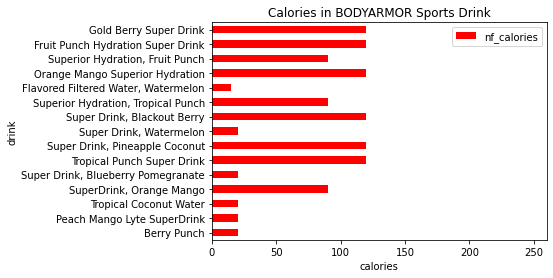

In [35]:
bodyarmor.plot.barh('food_name', 'nf_calories', color="#FF0000")
matplotlib.pyplot.ylabel("drink")
matplotlib.pyplot.xlabel("calories")
plt.title("Calories in BODYARMOR Sports Drink")
ax = matplotlib.pyplot.gca()
ax.set_xlim([0, 260])

(0.0, 260.0)

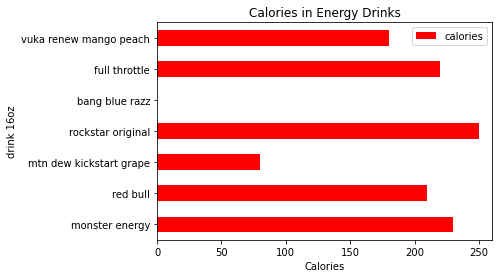

In [36]:
energy_nf.plot.barh('drink 16oz', 'calories', color="#FF0000")
plt.xlabel("Calories")
plt.title("Calories in Energy Drinks")
ax = matplotlib.pyplot.gca()
ax.set_xlim([0, 260])

In [37]:
#Next step is to merge energy_nf and bodyarmor to compare calories

## Pre Merge

In [38]:
energy_nf

,drink 16oz,sugar amount in g,caffeine in mg,sodium in mg,calories
0,monster energy,54,160,370,230
1,red bull,51,151,190,210
2,mtn dew kickstart grape,20,90,170,80
3,rockstar original,63,160,70,250
4,bang blue razz,0,300,40,0
5,full throttle,58,160,160,220
6,vuka renew mango peach,44,160,0,180


In [39]:
bodyarmor

,food_name,nf_calories
0,Berry Punch,20
2,Peach Mango Lyte SuperDrink,20
3,Tropical Coconut Water,20
4,"SuperDrink, Orange Mango",90
5,"Super Drink, Blueberry Pomegranate",20
6,Tropical Punch Super Drink,120
7,"Super Drink, Pineapple Coconut",120
8,"Super Drink, Watermelon",20
9,"Super Drink, Blackout Berry",120
10,"Superior Hydration, Tropical Punch",90


In [40]:
#droping unnecessary columns
energy_nf.drop(columns=['sugar amount in g', 'caffeine in mg', 'sodium in mg'], inplace=True)

In [41]:
#renames colmns in bodyarmor
bodyarmor.columns = ['drink 16oz', 'calories']
bodyarmor.columns

Index(['drink 16oz', 'calories'], dtype='object')

In [42]:
energy_nf

,drink 16oz,calories
0,monster energy,230
1,red bull,210
2,mtn dew kickstart grape,80
3,rockstar original,250
4,bang blue razz,0
5,full throttle,220
6,vuka renew mango peach,180


In [43]:
bodyarmor

,drink 16oz,calories
0,Berry Punch,20
2,Peach Mango Lyte SuperDrink,20
3,Tropical Coconut Water,20
4,"SuperDrink, Orange Mango",90
5,"Super Drink, Blueberry Pomegranate",20
6,Tropical Punch Super Drink,120
7,"Super Drink, Pineapple Coconut",120
8,"Super Drink, Watermelon",20
9,"Super Drink, Blackout Berry",120
10,"Superior Hydration, Tropical Punch",90


## The merge

In [44]:
allcalories = [bodyarmor, energy_nf]

In [45]:
result = pd.concat(allcalories)

In [46]:
result

,drink 16oz,calories
0,Berry Punch,20
2,Peach Mango Lyte SuperDrink,20
3,Tropical Coconut Water,20
4,"SuperDrink, Orange Mango",90
5,"Super Drink, Blueberry Pomegranate",20
6,Tropical Punch Super Drink,120
7,"Super Drink, Pineapple Coconut",120
8,"Super Drink, Watermelon",20
9,"Super Drink, Blackout Berry",120
10,"Superior Hydration, Tropical Punch",90


(0.0, 260.0)

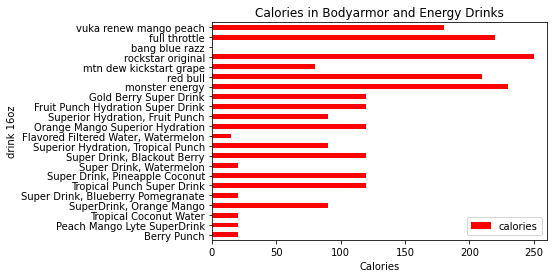

In [47]:
result.plot.barh('drink 16oz', 'calories', color="#FF0000")
plt.xlabel("Calories")
plt.title("Calories in Bodyarmor and Energy Drinks")
ax = matplotlib.pyplot.gca()
ax.set_xlim([0, 260])

# This concludes my first data project, thank you for reading. Hopefully you learned something new today. - carlos s